In [1]:
import pandas as pd
import emoji
import re
import html

In [2]:
df2 = pd.read_csv('/kaggle/input/dataset-final-inteligo/tweet_sentimen.csv')
df2['sumber'] = 'twitter'
df3 = pd.read_csv('/kaggle/input/dataset-final-inteligo/df_final_play_store_with_indobert_label.csv')
df3['sumber'] = 'playstore'
df_final = pd.concat([df2,df3])
df_final.to_csv('data_final.csv')

In [3]:
# df_final = df_final.sample(n=2000, random_state=21)  # Ganti 42 dengan bilangan acak yang Anda inginkan

# Hasilnya adalah DataFrame yang berisi 2000 baris yang diambil secara acak
df_final.status.value_counts()

status
negative    5480
positive    4761
neutral     3711
Name: count, dtype: int64

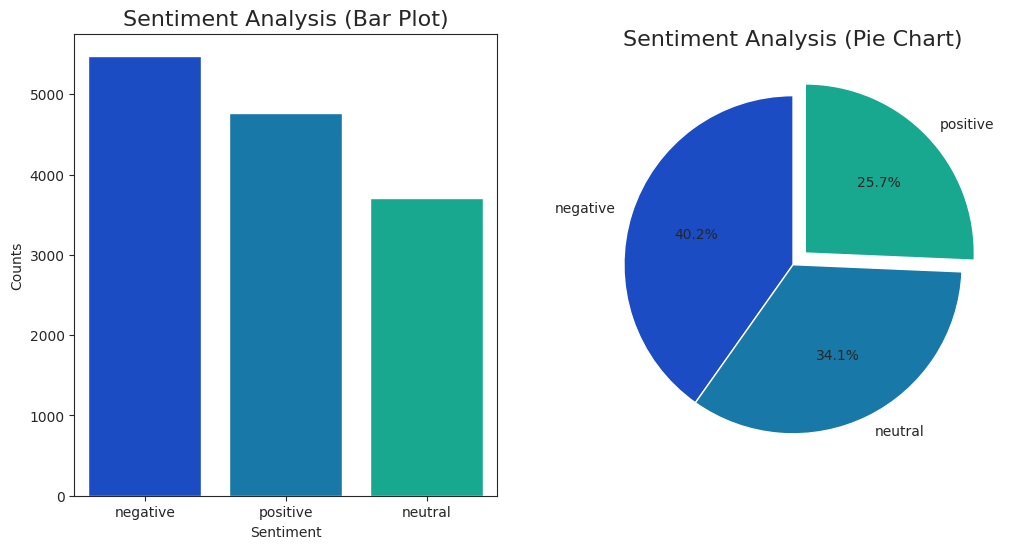

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')  # set background color to white
sns.set_palette('pastel')  # set palette color to 'pastel'

# membuat figure dan 2 axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# menggambar bar plot di axes pertama
sns.countplot(x=df_final["status"],ax=ax1,palette='winter',order=df_final["status"].value_counts().index)
ax1.set_title('Sentiment Analysis (Bar Plot)', fontsize=16)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Counts')

# menggambar pie chart di axes kedua

explode = (0, 0, 0.1)  # memberikan efek explode pada slice pertama
ax2.pie(df_final.groupby(['status']).sum().reset_index()['score'].sort_values(ascending=False), explode=explode, 
        labels=['negative','neutral','positive'], autopct='%1.1f%%',
        startangle=90,colors=['#1c4cc3','#1878a7','#18a88f'])
ax2.set_title('Sentiment Analysis (Pie Chart)', fontsize=16)

# menampilkan figure
plt.show()

In [5]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')
kamus = pd.read_csv("/kaggle/input/dataset-final-inteligo/kamus_alay.csv")
stopwords = ['sudah','kirim','paket','aplikasi','ekspedisi','kurir','barang',
    "yg", "utk", "cuman", "deh", "Btw", "tapi", "gua", "gue", "lo", "lu",
    "kalo", "trs", "jd", "nih", "ntar", "nya", "1g", "gk", "ecusli", "dpt",
    "dr", "kpn", "kok", "kyk", "donk", "yah", "u", "ya", "ga", "km", "eh",
    "sih", "en", "bang", "br", "kyk", "rp", "jt", "kan", "gpp", "sm", "usah",
    "mas", "sob", "thx", "ato", "jg", "g", "kuk", "mak", "haha", "ly", "tp",
    "haha", "dg", "dri", "duh", "ye", "wkwkwk", "syg", "btw", "nerjemahin",
    "gaes", "guys", "moga", "kmrn", "nemu", "yukkk", "klas", "iw", "ew",
    "Iho", "sbnry", "org", "gtu", "bwt", "klrga", "clau", "lbh", "cpet",
    "ku", "wke", "mba", "mas", "sdh", "kann", "ol", "spt", "dim", "bs",
    "krn", "jgn", "sapa", "spt", "sh", "wakakaka", "sihhh", "hehe", "in",
    "dgn", "la", "kl", "ttg", "mana", "kmna", "kmn", "tdk", "tuh", "dah",
    "kek", "ko", "pls", "bbrp", "pd", "mah", "dhhh", "kpd", "tuh", "kzl",
    "byar", "si", "sii", "cm", "sy", "hahahaha", "weh", "dlu", "tuhh"
]
stopwords_final = list(stopwords) + kamus.slang.values.tolist() + list_stopwords

In [6]:
def remove_short_words(tweet):
         # split the text into words
        words = tweet.split()
        # filter out words with less than 2 characters
        words = [word for word in words if len(word) > 3]
        tokens_without_stopword = [word for word in words if not word in stopwords_final]
        # join the remaining words into a string
        tweet = ' '.join(tokens_without_stopword)
        return tweet
df_final['Text_stopwords'] = df_final['Text'].apply(remove_short_words)
positive_class = df_final[df_final.status == 'positive']
negative_class = df_final[df_final.status == 'negative']
neutral_class = df_final[df_final.status == 'neutral']
df_final.head()

,Unnamed: 0,Text,status,score,sumber,Text_stopwords
0,0.0,ekspedisi investigasi tau whatsap nomer mengat...,neutral,0.992555,twitter,investigasi whatsap nomer mengatasnamakan cust...
1,1.0,kurir sicepat input lapor ngga ambil paket,neutral,0.994140,twitter,sicepat input lapor ambil
2,2.0,indonesian police indonesia numba one sicepat,neutral,0.996287,twitter,indonesian police indonesia numba sicepat
3,3.0,layan gin pake aja nyesel banget orang tunggu ...,negative,0.996596,twitter,layan banget orang tunggu sabar sicepat
4,4.0,whitepaper datanesia edisi april jasa kurir ki...,neutral,0.996738,twitter,whitepaper datanesia edisi april jasa kian les...


In [7]:
import nltk

# Selanjutnya, Anda perlu mengimpor modul atau fungsi tertentu yang Anda butuhkan, seperti ngrams atau stopwords, sesuai kebutuhan. Misalnya:
import unicodedata
from nltk.util import ngrams
from nltk.corpus import stopwords
def basic_clean(text):
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return words
words = basic_clean(''.join(str(negative_class['Text_stopwords'].tolist())))
onegrams = (pd.Series(nltk.ngrams(words,1)).value_counts()).head(10)
bigrams = (pd.Series(nltk.ngrams(words,2)).value_counts()).head(10)
trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts()) .head(10)
quadgrams = (pd.Series(nltk.ngrams(words, 4)).value_counts()).head(10)

In [8]:
import pandas as pd
import plotly.express as px
df = pd.Series(onegrams).reset_index()
df['Pasangan Kata'] = df['index'].apply(lambda x: ' '.join(x))  # Mengubah tuple menjadi string
# Mengurutkan DataFrame berdasarkan frekuensi
df = df.sort_values(by='count', ascending=False)

# Membuat bar chart interaktif menggunakan Plotly
fig = px.bar(df, x='count', y='Pasangan Kata', orientation='h', 
             title='Frekuensi Pasangan Kata')
fig.update_traces(marker_color='skyblue')
fig.update_layout(xaxis_title='Frekuensi', yaxis_title='Pasangan Kata', yaxis_categoryorder='total ascending')
fig.show()

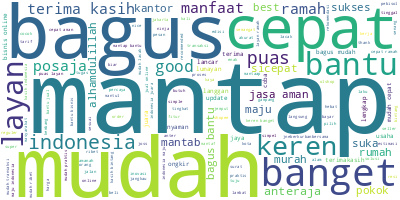

In [9]:
from tqdm.notebook import tqdm
from wordcloud import WordCloud # wordCloud

# Join the different processed titles together.
long_string = ','.join(list(positive_class['Text_stopwords'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

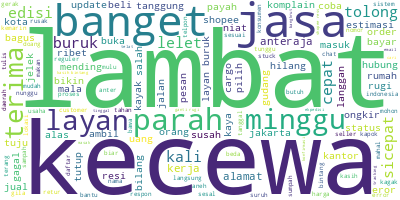

In [10]:
from tqdm.notebook import tqdm
from wordcloud import WordCloud # wordCloud

# Join the different processed titles together.
long_string = ','.join(list(negative_class['Text_stopwords'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

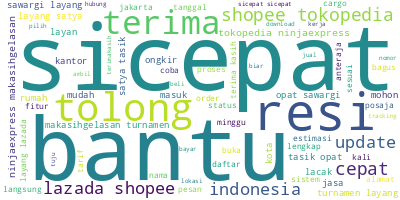

In [11]:
from tqdm.notebook import tqdm
from wordcloud import WordCloud # wordCloud

# Join the different processed titles together.
long_string = ','.join(list(neutral_class['Text_stopwords'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [12]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
from gensim.utils import tokenize as gtokenize
from gensim.utils import simple_preprocess

from pprint import pprint

# positive TM

In [47]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))  # deacc=True removes punctuations
#to list and tokenize the sentence
list_of_sentence = positive_class['Text_stopwords'].values.tolist()
data_words = list(sent_to_words(list_of_sentence))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [48]:
# Find best cluster amount
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,random_state=53, alpha='auto', eval_every=5) 
        #model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=53,workers=60)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [49]:
# plotting the graph
%matplotlib inline

start=1
limit=21
step=1
model_list=None
coherence_values=None
model_list, coherence_values_positif = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=start, limit=limit, step=step)

  0%|          | 0/20 [00:00<?, ?it/s]

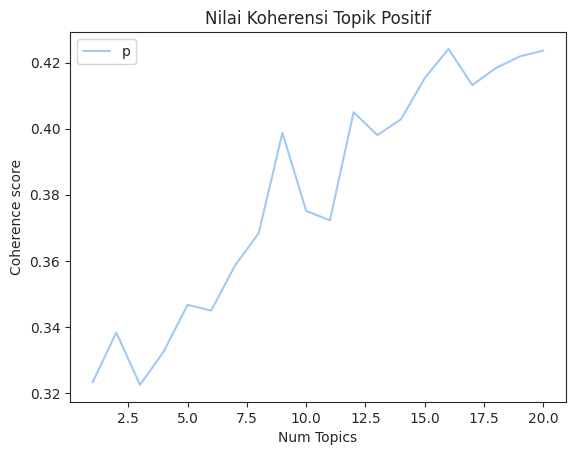

In [50]:
import matplotlib.pyplot as plt
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values_positif)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("positif"), loc='best')
plt.title("Nilai Koherensi Topik Positif")
plt.show()

In [17]:
highest_coherence_values = 0

for m, cv in zip(x, coherence_values_positif):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.323
Num Topics = 2  has Coherence Value of 0.338
Num Topics = 3  has Coherence Value of 0.322
Num Topics = 4  has Coherence Value of 0.333
Num Topics = 5  has Coherence Value of 0.347
Num Topics = 6  has Coherence Value of 0.345
Num Topics = 7  has Coherence Value of 0.359
Num Topics = 8  has Coherence Value of 0.368
Num Topics = 9  has Coherence Value of 0.399
Num Topics = 10  has Coherence Value of 0.375
Num Topics = 11  has Coherence Value of 0.372
Num Topics = 12  has Coherence Value of 0.405
Num Topics = 13  has Coherence Value of 0.398
Num Topics = 14  has Coherence Value of 0.403
Num Topics = 15  has Coherence Value of 0.415
Num Topics = 16  has Coherence Value of 0.424
Num Topics = 17  has Coherence Value of 0.413
Num Topics = 18  has Coherence Value of 0.418
Num Topics = 19  has Coherence Value of 0.422
Num Topics = 20  has Coherence Value of 0.424


In [30]:
num_topics = 17
optimal_model = model_list[num_topics-2]
model_topics = optimal_model.show_topics(formatted=False)
# pprint(optimal_model.print_topics(num_words=25))

In [19]:
import pandas as pd

# Initialize an empty DataFrame with column names
sent_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','Text'])

def format_topics_sentences(ldamodel, corpus, texts):
    # Initialize an empty list to store DataFrames
    dfs = []
    
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic_df = pd.DataFrame({'Dominant_Topic': [int(topic_num)],
                                         'Perc_Contribution': [round(prop_topic, 4)],
                                         'Topic_Keywords': [topic_keywords]})
                dfs.append(topic_df)

    # Concatenate the list of DataFrames
    sent_topics_df = pd.concat(dfs, ignore_index=True)
    
    return sent_topics_df

# Call the format_topics_sentences function
df_topic_sents_keywords = format_topics_sentences(optimal_model, corpus, list_of_sentence)

# Format
df_dominant_topic_positif = df_topic_sents_keywords.reset_index()
df_dominant_topic_positif['Text'] = list_of_sentence
df_dominant_topic_positif.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic_positif['status'] = 'positif'
positive_class = positive_class.reset_index()
df_dominant_topic_positif['sumber'] = positive_class['sumber']
df_dominant_topic_positif.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,status,sumber
0,0,7,0.3657,"bagus, layan, bantu, mudah, ramah, cepat, fast...",nyampenya maana maeenn dipickup minggu sicepat...,positif,twitter
1,1,7,0.7352,"bagus, layan, bantu, mudah, ramah, cepat, fast...",usaha online shop vanderism tanggap nyata mana...,positif,twitter
2,2,4,0.5737,"banget, kasih, terima, bagus, cepat, manfaat, ...",halu terang lacak halu banjar mudah mudah baro...,positif,twitter
3,3,1,0.7916,"cepat, ramah, murah, pokok, mudah, layan, bang...",sicepat anjink sicepat,positif,twitter
4,4,1,0.8329,"cepat, ramah, murah, pokok, mudah, layan, bang...",harga parfum murah banget harga lihat video ti...,positif,twitter


In [20]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_dominant_topic_positif.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.drop(columns='Document_No',inplace=True)
# # Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text",'status','sumber']
# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text,status,sumber
0,0,0.9605,"mantap, mudah, indonesia, good, sukses, transa...",keren anjak rumah kerja office posaja indonesi...,positif,playstore
1,1,0.9517,"cepat, ramah, murah, pokok, mudah, layan, bang...",shopee gratis ongkir suruh bayar ongkir beli s...,positif,playstore
2,2,0.9518,"bantu, bisnis, mantab, mudah, online, lacak, p...",brharap sicepat indonesia saing bawa lapang ke...,positif,twitter
3,3,0.9711,"keren, update, jasa, best, cepat, layan, puas,...",sayang layan puas kota tuju alas kota gudang t...,positif,playstore
4,4,0.9633,"banget, kasih, terima, bagus, cepat, manfaat, ...",faedah insyaalloh faedah ramadhan ardanfmbandu...,positif,twitter


In [21]:
# Number of Documents for Each Topic
topic_counts = df_dominant_topic_positif['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,0,"mantap, mudah, indonesia, good, sukses, transa...",1405,0.2951
1,1,"cepat, ramah, murah, pokok, mudah, layan, bang...",341,0.0716
2,2,"bantu, bisnis, mantab, mudah, online, lacak, p...",471,0.0989
3,3,"keren, update, jasa, best, cepat, layan, puas,...",521,0.1094
4,4,"banget, kasih, terima, bagus, cepat, manfaat, ...",571,0.1199
5,5,"anteraja, banget, cepat, ramah, sesuai, delive...",331,0.0695
6,6,"cepat, puas, bintang, aman, mudah, lumayan, la...",440,0.0924
7,7,"bagus, layan, bantu, mudah, ramah, cepat, fast...",681,0.1430


In [22]:
for i in range(8):
    print(df_dominant_topics.Topic_Keywords.iloc[i])

mantap, mudah, indonesia, good, sukses, transaksi, bantu, rumah, cepat, terimakasih
cepat, ramah, murah, pokok, mudah, layan, banget, harga, ongkir, jakarta
bantu, bisnis, mantab, mudah, online, lacak, profesional, fiturnya, banget, cepat
keren, update, jasa, best, cepat, layan, puas, bagus, mudah, tingkat
banget, kasih, terima, bagus, cepat, manfaat, suka, edisi, jaya, jasa
anteraja, banget, cepat, ramah, sesuai, delivery, mantul, akurat, anter, good
cepat, puas, bintang, aman, mudah, lumayan, layan, juara, banget, kali
bagus, layan, bantu, mudah, ramah, cepat, fast, anteraja, maju, indonesia


# Negative TM

In [31]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))  # deacc=True removes punctuations
#to list and tokenize the sentence
list_of_sentence = negative_class['Text_stopwords'].values.tolist()
data_words = list(sent_to_words(list_of_sentence))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# Find best cluster amount
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
 
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,random_state=53, alpha='auto', eval_every=5) 
        #model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=53,workers=60)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [32]:
# plotting the graph
%matplotlib inline

start=1
limit=21
step=1
model_list=None
coherence_values=None
model_list, coherence_values_negatif = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=start, limit=limit, step=step)

  0%|          | 0/20 [00:00<?, ?it/s]

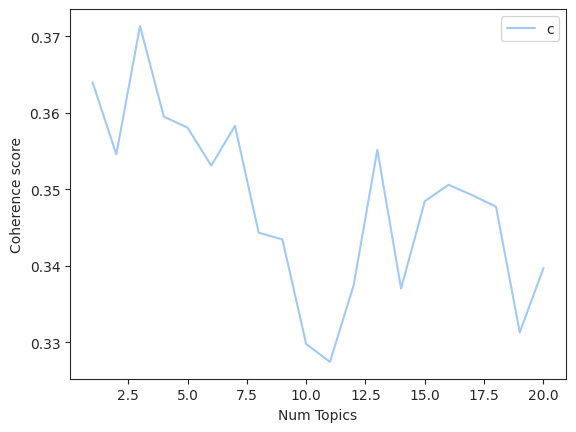

In [33]:
import matplotlib.pyplot as plt
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values_negatif)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [55]:
highest_coherence_values = 0

for m, cv in zip(x, coherence_values_negatif):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.364
Num Topics = 2  has Coherence Value of 0.355
Num Topics = 3  has Coherence Value of 0.371
Num Topics = 4  has Coherence Value of 0.359
Num Topics = 5  has Coherence Value of 0.358
Num Topics = 6  has Coherence Value of 0.353
Num Topics = 7  has Coherence Value of 0.358
Num Topics = 8  has Coherence Value of 0.344
Num Topics = 9  has Coherence Value of 0.343
Num Topics = 10  has Coherence Value of 0.33
Num Topics = 11  has Coherence Value of 0.327
Num Topics = 12  has Coherence Value of 0.337
Num Topics = 13  has Coherence Value of 0.355
Num Topics = 14  has Coherence Value of 0.337
Num Topics = 15  has Coherence Value of 0.348
Num Topics = 16  has Coherence Value of 0.351
Num Topics = 17  has Coherence Value of 0.349
Num Topics = 18  has Coherence Value of 0.348
Num Topics = 19  has Coherence Value of 0.331
Num Topics = 20  has Coherence Value of 0.34


In [34]:
num_topics = 4 
optimal_model = model_list[num_topics-2]
model_topics = optimal_model.show_topics(formatted=False)
# pprint(optimal_model.print_topics(num_words=25))

In [35]:
import pandas as pd

# Initialize an empty DataFrame with column names
sent_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','Text'])

def format_topics_sentences(ldamodel, corpus, texts):
    # Initialize an empty list to store DataFrames
    dfs = []
    
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic_df = pd.DataFrame({'Dominant_Topic': [int(topic_num)],
                                         'Perc_Contribution': [round(prop_topic, 4)],
                                         'Topic_Keywords': [topic_keywords]})
                dfs.append(topic_df)

    # Concatenate the list of DataFrames
    sent_topics_df = pd.concat(dfs, ignore_index=True)
    
    return sent_topics_df

# Call the format_topics_sentences function
df_topic_sents_keywords = format_topics_sentences(optimal_model, corpus, list_of_sentence)

# Format
df_dominant_topic_negatif = df_topic_sents_keywords.reset_index()
df_dominant_topic_negatif['Text'] = list_of_sentence
df_dominant_topic_negatif.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic_negatif['status'] = 'negatif'
negative_class = negative_class.reset_index()
df_dominant_topic_negatif['sumber'] = negative_class['sumber']
df_dominant_topic_negatif.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,status,sumber
0,0,2,0.9009,"kecewa, banget, jasa, lambat, layan, alamat, m...",layan banget orang tunggu sabar sicepat,negatif,twitter
1,1,1,0.9488,"lambat, ongkir, tolong, resi, update, edisi, m...",hoax patner percaya komplain platform hours de...,negatif,twitter
2,2,2,0.9533,"kecewa, banget, jasa, lambat, layan, alamat, m...",tolong rekomendasi banned keluh sicepat diam s...,negatif,twitter
3,3,1,0.6511,"lambat, ongkir, tolong, resi, update, edisi, m...",stuck update sicepat,negatif,twitter
4,4,0,0.9013,"parah, buruk, layan, jasa, terima, banget, tol...",telp bilang kasih baca trackingnya keluaaaaaar...,negatif,twitter


In [36]:
df_dominant_topic_negatif.Keywords.unique()

array(['kecewa, banget, jasa, lambat, layan, alamat, minggu, lelet, buruk, kali',
       'lambat, ongkir, tolong, resi, update, edisi, masuk, eror, susah, kecewa',
       'parah, buruk, layan, jasa, terima, banget, tolong, tanggal, bayar, mending'],
      dtype=object)

In [37]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.drop(columns='Document_No',inplace=True)
# # Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
# Show
sent_topics_sorteddf_mallet.head()

NameError: name 'df_dominant_topic' is not defined

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_dominant_topic['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [ ]:
for i in range(3):
    print(i,df_dominant_topics.Topic_Keywords.iloc[i])

# neutral TM

In [38]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))  # deacc=True removes punctuations
#to list and tokenize the sentence
list_of_sentence = neutral_class['Text_stopwords'].values.tolist()
data_words = list(sent_to_words(list_of_sentence))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# Find best cluster amount
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
 
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,random_state=53, alpha='auto', eval_every=5) 
        #model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=53,workers=60)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [39]:
# plotting the graph
%matplotlib inline

start=1
limit=21
step=1
model_list=None
coherence_values=None
model_list, coherence_values_netral = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=start, limit=limit, step=step)

  0%|          | 0/20 [00:00<?, ?it/s]

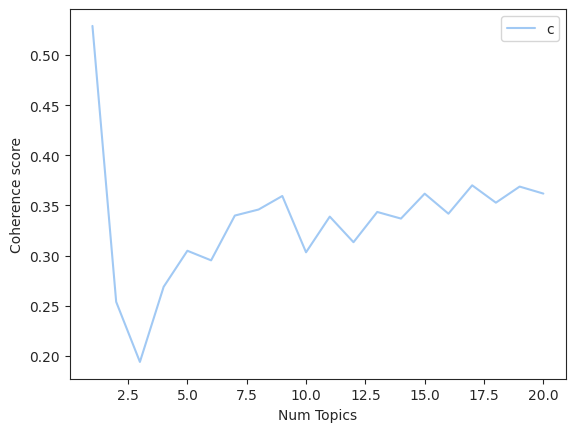

In [40]:
import matplotlib.pyplot as plt
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values_netral)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
highest_coherence_values = 0

for m, cv in zip(x, coherence_values_netral):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.529
Num Topics = 2  has Coherence Value of 0.254
Num Topics = 3  has Coherence Value of 0.194
Num Topics = 4  has Coherence Value of 0.269
Num Topics = 5  has Coherence Value of 0.305
Num Topics = 6  has Coherence Value of 0.295
Num Topics = 7  has Coherence Value of 0.34
Num Topics = 8  has Coherence Value of 0.346
Num Topics = 9  has Coherence Value of 0.359
Num Topics = 10  has Coherence Value of 0.303
Num Topics = 11  has Coherence Value of 0.339
Num Topics = 12  has Coherence Value of 0.313
Num Topics = 13  has Coherence Value of 0.343
Num Topics = 14  has Coherence Value of 0.337
Num Topics = 15  has Coherence Value of 0.362
Num Topics = 16  has Coherence Value of 0.342
Num Topics = 17  has Coherence Value of 0.37
Num Topics = 18  has Coherence Value of 0.353
Num Topics = 19  has Coherence Value of 0.369
Num Topics = 20  has Coherence Value of 0.362


In [41]:
num_topics = 2 
optimal_model = model_list[num_topics-2]
model_topics = optimal_model.show_topics(formatted=False)
# pprint(optimal_model.print_topics(num_words=25))

In [42]:
import pandas as pd

# Initialize an empty DataFrame with column names
sent_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','Text'])

def format_topics_sentences(ldamodel, corpus, texts):
    # Initialize an empty list to store DataFrames
    dfs = []
    
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic_df = pd.DataFrame({'Dominant_Topic': [int(topic_num)],
                                         'Perc_Contribution': [round(prop_topic, 4)],
                                         'Topic_Keywords': [topic_keywords]})
                dfs.append(topic_df)

    # Concatenate the list of DataFrames
    sent_topics_df = pd.concat(dfs, ignore_index=True)
    
    return sent_topics_df

# Call the format_topics_sentences function
df_topic_sents_keywords = format_topics_sentences(optimal_model, corpus, list_of_sentence)

# Format
df_dominant_topic_netral = df_topic_sents_keywords.reset_index()
df_dominant_topic_netral['Text'] = list_of_sentence
df_dominant_topic_netral.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic_netral['status'] = 'netral'
neutral_class = neutral_class.reset_index()
df_dominant_topic_netral['sumber'] = neutral_class['sumber']
df_dominant_topic_netral.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,status,sumber
0,0,0,1.0,"bantu, sicepat, terima, resi, tolong, mudah, i...",investigasi whatsap nomer mengatasnamakan cust...,netral,twitter
1,1,0,1.0,"bantu, sicepat, terima, resi, tolong, mudah, i...",sicepat input lapor ambil,netral,twitter
2,2,0,1.0,"bantu, sicepat, terima, resi, tolong, mudah, i...",indonesian police indonesia numba sicepat,netral,twitter
3,3,0,1.0,"bantu, sicepat, terima, resi, tolong, mudah, i...",whitepaper datanesia edisi april jasa kian les...,netral,twitter
4,4,0,1.0,"bantu, sicepat, terima, resi, tolong, mudah, i...",gaji hehehe teman teman belanja jasa komen dat...,netral,twitter


In [44]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_dominant_topic_netral.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.drop(columns='Document_No',inplace=True)
# # Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
# Show
sent_topics_sorteddf_mallet.head()

ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_dominant_topic['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics_netral = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics_netral.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics_netral

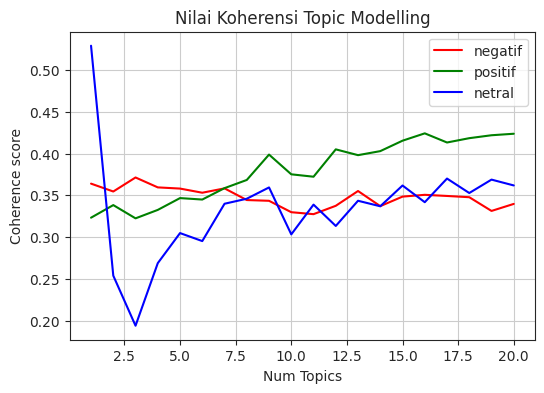

In [53]:
# Membuat grafik
plt.figure(figsize=(6, 4))  # Ukuran grafik
plt.plot(x, coherence_values_negatif, label='negatif', color='red')
plt.plot(x, coherence_values_positif, label='positif', color='green')
plt.plot(x, coherence_values_netral, label='netral', color='blue')

# Menambahkan label sumbu x dan y
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.title('Nilai Koherensi Topic Modelling')
plt.grid(True)  # Menambahkan grid (opsional)
plt.show()

In [ ]:
df_fix = pd.concat([df_dominant_topic_netral,df_dominant_topic_negatif,df_dominant_topic_positif])

In [ ]:
replacement_dict = {
    'parah, buruk, layan, jasa, terima, banget, tolong, tanggal, bayar, mending':'Pelayanan sangat buruk',
    'lambat, ongkir, tolong, resi, update, edisi, masuk, eror, susah, kecewa':'Pengiriman lambat, susah tracking resi',
    'kecewa, banget, jasa, lambat, layan, alamat, minggu, lelet, buruk, kali':'Pelayanan lambat dan buruk',
    'bantu, sicepat, terima, resi, tolong, mudah, indonesia, masuk, update, lacak':'Update layanan pelacakan resi',
    'mantap, mudah, indonesia, ninja, transaksi, online, rumah, bantu, posaja, sukses': 'Kemudahan transaksi',
    'cepat, ramah, ongkir, layan, mudah, tuju, murah, banget, service, aman': 'Ongkos kirim murah',
    'bantu, bisnis, online, bagus, alhamdulillah, pilih, mudah, bismillah, jual, sayang': 'Membantu bisnis online',
    'keren, update, bagus, joss, fiturnya, mudah, banget, bantu, tarik, puas': 'Fitur aplikasi bagus',
    'bagus, kasih, terima, manfaat, suka, banget, jaya, amanah, indonesia, kantor': 'Memberikan manfaat',
    'ramah, banget, anteraja, delivery, cepat, sesuai, mantul, mantap, layan, super': 'Pengiriman cepat dan mantap',
    'puas, cepat, lumayan, mudah, kilat, recommended, aman, mantaap, juara, biaya': 'Ekspedisi direkomendasikan oleh konsumen',
    'bagus, layan, cepat, anteraja, mudah, ramah, proses, jasa, terimakasih, bintang': 'Pengiriman cepat, layanan ramah',
    'mantab, kali, sukses, titip, ramah, akurat, okee, kemarin, jamin, enak': 'Keramahan pelayanan',
    'banget, jasa, mudah, cepat, maju, bantu, resi, indonesia, suka, tracking': 'Kemudahan tracking paket',
    'coba, untung, ringan, cinta, langgan, anak, bagus, cakep, speed, manja' : 'Cocok dijadikan langganan',
    'cepat, mantap, pokok, bintang, lancar, layan, tingkat, kendala, murah, tahan' : 'Pelayanan cepat, harga murah',
    'good, anteraja, cepat, mudah, tarif, percaya, kerja, lacak, akurat, minggu' : 'Ekspedisi terpercaya dan akurat',
    'bagus, bantu, banget, harga, upgrade, ribu, jangkau, menu, terimakasih, nama' : 'UI/UX aplikasi bagus',
    'best, edisi, hebat, indonesia, jakarta, sistem, gampang, simpel, istimewa, hubung' : 'Kemudahan menggunakan aplikasi',
    'cepat, ramah, kasih, layan, terima, banget, respon, anter, mudah, fast' : 'Respon cepat'
}

# Mengganti nilai dalam kolom 'Text' dengan menggunakan metode .replace()
df_fix['Keywords_kategori'] = df_fix['Keywords'].replace(replacement_dict)
df_fix.Keywords_kategori.value_counts()

In [ ]:
df_fix.to_excel('data_deploy.xlsx',index=False)